In [145]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from datetime import timedelta

from scipy import stats
import warnings
warnings.filterwarnings("ignore")

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
Description: Product (item) name. Nominal.
Quantity: The quantities of each product (item) per transaction. Numeric.
InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
UnitPrice: Unit price. Numeric, Product price per unit in sterling.
CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
Country: Country name. Nominal, the name of the country where each customer resides.

In [167]:
data.Description[0]

'WHITE HANGING HEART T-LIGHT HOLDER'

In [3]:
data=pd.read_csv('data.csv',encoding = 'unicode_escape')

In [4]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [16]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [11]:
data.duplicated().sum()

5225

In [12]:
data.drop_duplicates(inplace=True)

In [15]:
data.CustomerID.unique().shape

(4372,)

In [18]:
data.StockCode.unique().shape

(3684,)

In [73]:
data=data[~data.Quantity<0]

In [76]:
data[data.UnitPrice<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_of_the_week,TotalRevenue


In [77]:
#Какой товар покупали больше всего?
id=data.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).index[0]
data[data.StockCode==id][['StockCode','Description']].iloc[0]

StockCode                            23843
Description    PAPER CRAFT , LITTLE BIRDIE
Name: 540421, dtype: object

In [78]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])

In [79]:
data['day_of_the_week'] = data['InvoiceDate'].dt.day_name()

In [80]:
#Сколько покупок в каждый день недели
days = data.groupby('day_of_the_week', as_index=False).agg({'InvoiceNo':'count'})
days

,day_of_the_week,InvoiceNo
0,Friday,54231
1,Monday,64237
2,Sunday,61214
3,Thursday,79260
4,Tuesday,65747
5,Wednesday,68043


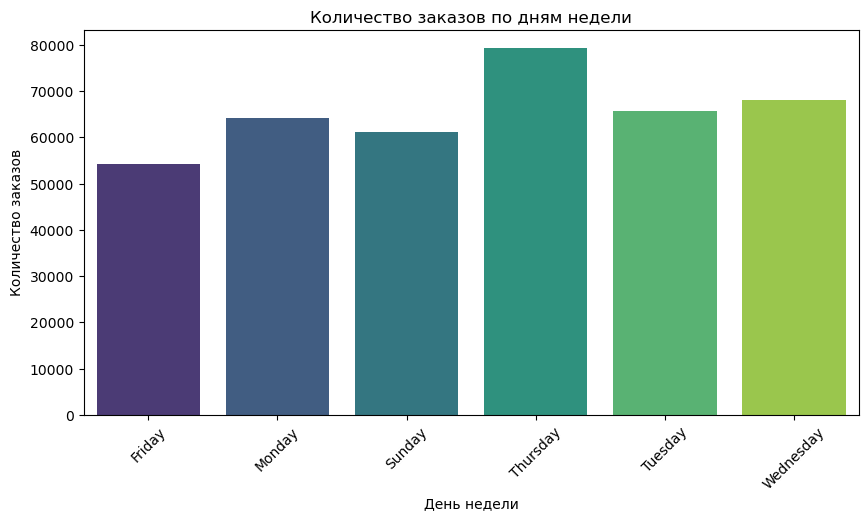

In [81]:
plt.figure(figsize=(10, 5))
sns.barplot(x='day_of_the_week', y='InvoiceNo', data=days, palette='viridis')

plt.xlabel('День недели')
plt.ylabel('Количество заказов')
plt.title('Количество заказов по дням недели')
plt.xticks(rotation=45)  

plt.show()

In [82]:
most_popular_day = data.groupby(['StockCode', 'day_of_the_week']).agg({'UnitPrice': 'count'}).reset_index()
most_popular_day

,StockCode,day_of_the_week,UnitPrice
0,10002,Friday,9
1,10002,Monday,7
2,10002,Sunday,9
3,10002,Thursday,12
4,10002,Tuesday,7
...,...,...,...
19139,POST,Monday,167
19140,POST,Sunday,83
19141,POST,Thursday,251
19142,POST,Tuesday,170


In [83]:
most_popular_day.pivot(index='StockCode', columns='day_of_the_week', values='UnitPrice').idxmax(axis=1).to_frame().reset_index().rename(columns={0:'most_popular_day'})

,StockCode,most_popular_day
0,10002,Thursday
1,10080,Monday
2,10120,Friday
3,10123C,Friday
4,10124A,Sunday
...,...,...
3660,C2,Thursday
3661,DOT,Monday
3662,M,Monday
3663,PADS,Sunday


In [84]:
#Кто чаще всего делает заказы?
top_customers = data.groupby('CustomerID', as_index=False) \
                    .agg({'InvoiceNo': 'nunique'}) \
                    .sort_values(by='InvoiceNo', ascending=False) \
                    .head(10)
top_customers

,CustomerID,InvoiceNo
326,12748.0,210
1880,14911.0,201
4011,17841.0,124
562,13089.0,97
1662,14606.0,93
2177,15311.0,91
481,12971.0,86
1690,14646.0,74
2703,16029.0,63
796,13408.0,62


In [85]:
#Какой товар принес больше всего выручки?
data['TotalRevenue'] = data['Quantity'] * data['UnitPrice']

top_revenue_product = data.groupby('StockCode', as_index=False) \
                          .agg({'TotalRevenue': 'sum'}) \
                          .sort_values(by='TotalRevenue', ascending=False) \
                          .head(10)
top_revenue_product

,StockCode,TotalRevenue
2399,23843,168469.60
1288,22423,142264.75
3233,85123A,100547.45
3219,85099B,85040.54
1997,23166,81416.73
3664,POST,77803.96
2593,47566,68785.23
3059,84879,56413.03
3662,M,53419.93
1919,23084,51251.24


In [89]:
#Какую сумму в среднем тратит клиент за заказ?
avg_check = data.groupby('CustomerID', as_index=False) \
                .agg({'TotalRevenue': 'sum', 'InvoiceNo': 'nunique'})
avg_check['AvgCheck'] = avg_check['TotalRevenue'] / avg_check['InvoiceNo']
avg_check = avg_check[['CustomerID', 'AvgCheck']].sort_values(by='AvgCheck', ascending=False)
avg_check

,CustomerID,AvgCheck
3009,16446.0,84236.250000
0,12346.0,77183.600000
2503,15749.0,14844.766667
2012,15098.0,13305.500000
10,12357.0,6207.670000
...,...,...
3996,17816.0,9.140000
1794,14792.0,6.200000
3218,16738.0,3.750000
3015,16454.0,3.450000


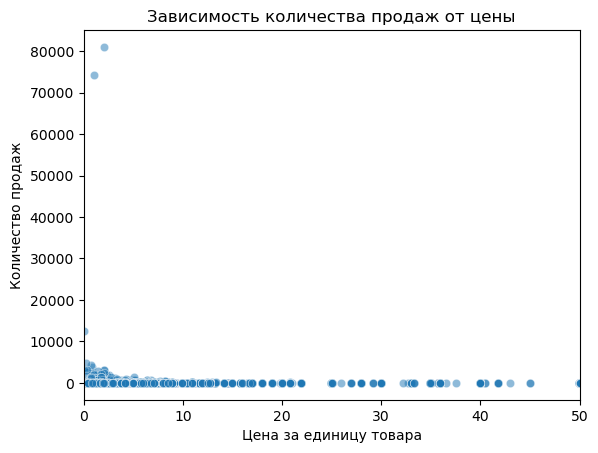

In [90]:
sns.scatterplot(x='UnitPrice', y='Quantity', data=data, alpha=0.5)
plt.xlabel('Цена за единицу товара')
plt.ylabel('Количество продаж')
plt.title('Зависимость количества продаж от цены')
plt.xlim(0, 50)  
plt.show()

In [134]:
cohorts = data[['CustomerID', 'InvoiceDate']]
cohorts['CustomerID'] = data.CustomerID.apply(lambda x: int(x))
cohorts['order_month'] = cohorts.InvoiceDate.apply(lambda x: x.strftime('%Y-%m'))
cohorts

,CustomerID,InvoiceDate,order_month
0,17850,2010-12-01 08:26:00,2010-12
1,17850,2010-12-01 08:26:00,2010-12
2,17850,2010-12-01 08:26:00,2010-12
3,17850,2010-12-01 08:26:00,2010-12
4,17850,2010-12-01 08:26:00,2010-12
...,...,...,...
541904,12680,2011-12-09 12:50:00,2011-12
541905,12680,2011-12-09 12:50:00,2011-12
541906,12680,2011-12-09 12:50:00,2011-12
541907,12680,2011-12-09 12:50:00,2011-12


In [135]:
cohorts.set_index('CustomerID', inplace=True)
cohorts['join_month'] = cohorts.groupby(level=0)['InvoiceDate'].min().apply(lambda x: x.strftime('%Y-%m'))
cohorts.reset_index(inplace=True)
cohorts.insert(len(cohorts.columns), 'orders_num', 0, allow_duplicates=False)
cohorts

,CustomerID,InvoiceDate,order_month,join_month,orders_num
0,17850,2010-12-01 08:26:00,2010-12,2010-12,0
1,17850,2010-12-01 08:26:00,2010-12,2010-12,0
2,17850,2010-12-01 08:26:00,2010-12,2010-12,0
3,17850,2010-12-01 08:26:00,2010-12,2010-12,0
4,17850,2010-12-01 08:26:00,2010-12,2010-12,0
...,...,...,...,...,...
392727,12680,2011-12-09 12:50:00,2011-12,2011-08,0
392728,12680,2011-12-09 12:50:00,2011-12,2011-08,0
392729,12680,2011-12-09 12:50:00,2011-12,2011-08,0
392730,12680,2011-12-09 12:50:00,2011-12,2011-08,0


In [136]:
cohorts_1 = cohorts.groupby(['join_month', 'order_month']) \
                   .agg({'CustomerID': 'nunique', 'orders_num': 'count'}) \
                   .rename(columns={'CustomerID': 'total_customers'})
cohorts_1

total_customers  orders_num
join_month order_month                             
2010-12    2010-12                  885       25673
           2011-01                  324       10114
           2011-02                  286        8689
           2011-03                  340       11122
           2011-04                  321        9628
...                                 ...         ...
2011-10    2011-11                   86        3499
           2011-12                   41         869
2011-11    2011-11                  324       10824
           2011-12                   36        1100
2011-12    2011-12                   41         961

[91 rows x 2 columns]

In [137]:
def CohortPeriod(C):
    C['cohort_period'] = np.arange(len(C)) + 0
    return C
cohorts_1 = cohorts_1.groupby(level=0).apply(CohortPeriod)
cohorts_1.index = cohorts_1.index.droplevel(0)
cohorts_1

total_customers  orders_num  cohort_period
join_month order_month                                            
2010-12    2010-12                  885       25673              0
           2011-01                  324       10114              1
           2011-02                  286        8689              2
           2011-03                  340       11122              3
           2011-04                  321        9628              4
...                                 ...         ...            ...
2011-10    2011-11                   86        3499              1
           2011-12                   41         869              2
2011-11    2011-11                  324       10824              0
           2011-12                   36        1100              1
2011-12    2011-12                   41         961              0

[91 rows x 3 columns]

In [138]:
cohorts_1.reset_index(inplace=True)
cohorts_1.set_index(['cohort_period', 'join_month'], inplace=True)
cohorts_1

,,order_month,total_customers,orders_num
cohort_period,join_month,,,
0,2010-12,2010-12,885,25673
1,2010-12,2011-01,324,10114
2,2010-12,2011-02,286,8689
3,2010-12,2011-03,340,11122
4,2010-12,2011-04,321,9628
...,...,...,...,...
1,2011-10,2011-11,86,3499
2,2011-10,2011-12,41,869
0,2011-11,2011-11,324,10824


In [139]:
cohort_group_size = cohorts_1['total_customers'].groupby(level=1).first()
cohorts_1['total_customers'].unstack(0)

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12
join_month,,,,,,,,,,,,,
2010-12,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
retention_rate = cohorts_1['total_customers'].unstack(0).divide(cohort_group_size, axis=0)
retention_rate

cohort_period,0,1,2,3,4,5,6,7,8,9,10,11,12
join_month,,,,,,,,,,,,,
2010-12,1.0,0.366102,0.323164,0.384181,0.362712,0.397740,0.362712,0.349153,0.353672,0.395480,0.374011,0.502825,0.265537
2011-01,1.0,0.220624,0.266187,0.230216,0.321343,0.287770,0.247002,0.242206,0.299760,0.326139,0.364508,0.117506,NaN
2011-02,1.0,0.186842,0.186842,0.284211,0.271053,0.247368,0.252632,0.278947,0.247368,0.305263,0.068421,NaN,NaN
2011-03,1.0,0.150442,0.252212,0.199115,0.223451,0.168142,0.267699,0.230088,0.278761,0.086283,NaN,NaN,NaN
2011-04,1.0,0.213333,0.203333,0.210000,0.196667,0.226667,0.216667,0.260000,0.073333,NaN,NaN,NaN,NaN
2011-05,1.0,0.190141,0.172535,0.172535,0.207746,0.232394,0.264085,0.095070,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.173554,0.157025,0.264463,0.231405,0.334711,0.095041,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.180851,0.207447,0.223404,0.271277,0.111702,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.207101,0.248521,0.242604,0.124260,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [143]:
def C_A(cohorts, customer_unique_id, order_purchase_timestamp):
    cohorts['order_month'] = cohorts.order_purchase_timestamp.apply(lambda x: x.strftime('%Y-%m'))
    
    cohorts.set_index('customer_unique_id', inplace=True)
    cohorts['join_month'] = cohorts.groupby(level=0)['order_purchase_timestamp'].min().apply(lambda x: x.strftime('%Y-%m'))
    cohorts.reset_index(inplace=True)
    cohorts.insert(len(cohorts.columns), 'orders_num', 0, allow_duplicates=False)
    
    cohorts_1 = cohorts_1.groupby(['join_month', 'order_month']) \
                         .agg({'customer_unique_id': pd.Series.nunique, 'orders_num': pd.Series.count}) \
                         .rename(columns={'customer_unique_id': 'total_customers'})
    
    def CohortPeriod(Coh):
        Coh['cohort_period'] = np.arange(len(C)) + 0
        return Coh
    cohorts_1 = cohorts_1.groupby(level=0).apply(CohortPeriod)
    
    cohorts_1.reset_index(inplace=True)
    cohorts_1.set_index(['cohort_period', 'join_month'], inplace=True)
    cohort_group_size = cohorts_1['total_customers'].groupby(level=1).first()
    retention_rate = cohorts_1['total_customers'].unstack(0).divide(cohort_group_size, axis=0)
    
    return retention_rate 

## RFM

In [150]:
date_max = max(data.InvoiceDate) + timedelta(days=1)
recency = data.groupby('CustomerID') \
              .agg({'InvoiceDate': lambda x: (date_max - x.max()).days}) \
              .reset_index() \
              .rename(columns={'InvoiceDate': 'recency'})
recency['recency'] = recency['recency'].astype('int16')
recency

,CustomerID,recency
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310
...,...,...
4334,18280.0,278
4335,18281.0,181
4336,18282.0,8
4337,18283.0,4


In [151]:
frequency = data.groupby('CustomerID', as_index=False) \
                .agg({'InvoiceDate': 'count'}) \
                .rename(columns={'InvoiceDate': 'frequency'})
frequency

,CustomerID,frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,721


In [152]:
monetary = data.groupby('CustomerID', as_index=False) \
                      .agg({'UnitPrice': 'sum'}) \
                      .rename(columns={'UnitPrice': 'monetary'})
monetary

,CustomerID,monetary
0,12346.0,1.04
1,12347.0,481.21
2,12348.0,178.71
3,12349.0,605.10
4,12350.0,65.30
...,...,...
4334,18280.0,47.65
4335,18281.0,39.36
4336,18282.0,62.39
4337,18283.0,1174.33


In [153]:
rfm = recency.merge(frequency, on='CustomerID').merge(monetary) \
             .rename(columns={'order_purchase_timestamp_x': 'recency', 'order_purchase_timestamp_y': 'frequency'})
rfm.head()

,CustomerID,recency,frequency,monetary
0,12346.0,326,1,1.04
1,12347.0,2,182,481.21
2,12348.0,75,31,178.71
3,12349.0,19,73,605.10
4,12350.0,310,17,65.30


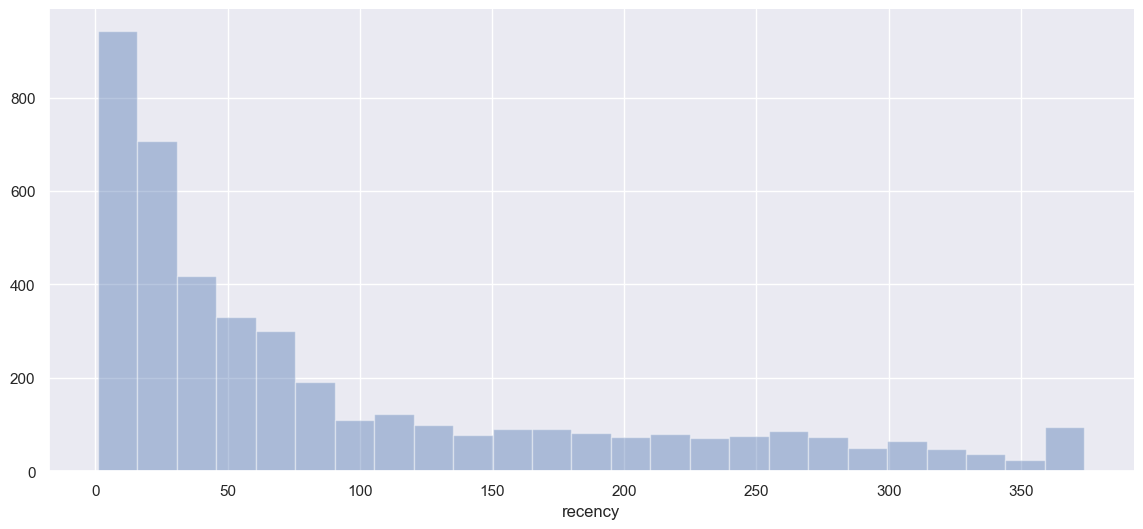

In [154]:
sns.set(rc={'figure.figsize':(14, 6)})
sns.distplot(rfm.recency, kde=False)
sns.despine()

In [155]:
def R(recency):
    if recency <= 100:
        return 3
    elif recency > 290:
        return 1
    else:
        return 2

rfm['r'] = rfm.recency.apply(R)

In [156]:
def F(frequency):
    if frequency == 1:
        return 1
    elif frequency == 2:
        return 2
    else:
        return 3

rfm['f'] = rfm.frequency.apply(F)

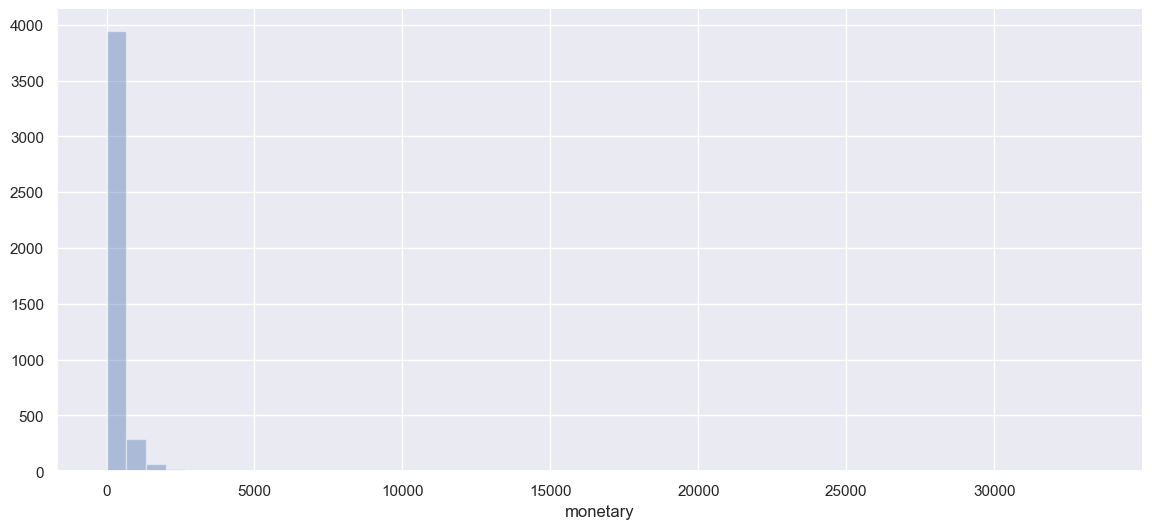

In [157]:
sns.distplot(rfm.monetary, kde=False)
sns.despine()

In [158]:
def M(monetary):
    if monetary <= 100:
        return 1
    elif monetary > 1000:
        return 3
    else:
        return 2

rfm['m'] = rfm.monetary.apply(M)

In [159]:
rfm['RFM'] = rfm['r'].astype(str) + rfm['f'].astype(str) + rfm['m'].astype(str)
rfm.head()

,CustomerID,recency,frequency,monetary,r,f,m,RFM
0,12346.0,326,1,1.04,1,1,1,111
1,12347.0,2,182,481.21,3,3,2,332
2,12348.0,75,31,178.71,3,3,2,332
3,12349.0,19,73,605.10,3,3,2,332
4,12350.0,310,17,65.30,1,3,1,131


In [160]:
rfm_graph = rfm.groupby('RFM', as_index=False) \
               .agg({'CustomerID': 'count'}) \
               .rename(columns={'CustomerID': 'num_of_customers'})
rfm_graph.head()

,RFM,num_of_customers
0,111,20
1,112,2
2,121,5
3,131,195
4,132,72


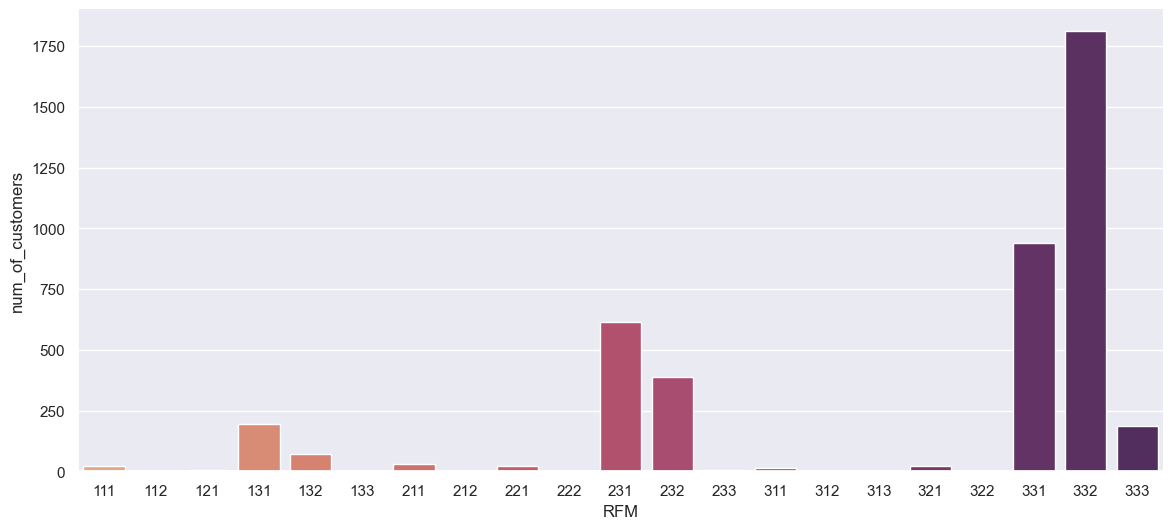

In [161]:
sns.barplot(data=rfm_graph, x='RFM', y='num_of_customers', palette="flare")
sns.despine()

In [162]:
#KMEANS
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['recency', 'frequency', 'monetary']])
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)

rfm['cluster_center'] = kmeans.cluster_centers_[rfm['cluster'], 0]

rfm

,CustomerID,recency,frequency,monetary,r,f,m,RFM,cluster,cluster_center
0,12346.0,326,1,1.04,1,1,1,111,1,1.569495
1,12347.0,2,182,481.21,3,3,2,332,0,-0.486161
2,12348.0,75,31,178.71,3,3,2,332,0,-0.486161
3,12349.0,19,73,605.10,3,3,2,332,0,-0.486161
4,12350.0,310,17,65.30,1,3,1,131,1,1.569495
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,278,10,47.65,2,3,1,231,1,1.569495
4335,18281.0,181,7,39.36,2,3,1,231,1,1.569495
4336,18282.0,8,12,62.39,3,3,1,331,0,-0.486161
4337,18283.0,4,721,1174.33,3,3,3,333,3,-0.773350


In [163]:
rfm.groupby('cluster').agg({
    'recency': 'mean', 
    'frequency': 'mean', 
    'monetary': 'mean'
})

,recency,frequency,monetary
cluster,,,
0,43.913556,73.204650,218.883020
1,249.465028,27.250473,95.543564
2,2.000000,5718.000000,22685.697500
3,15.170404,526.735426,1646.747803


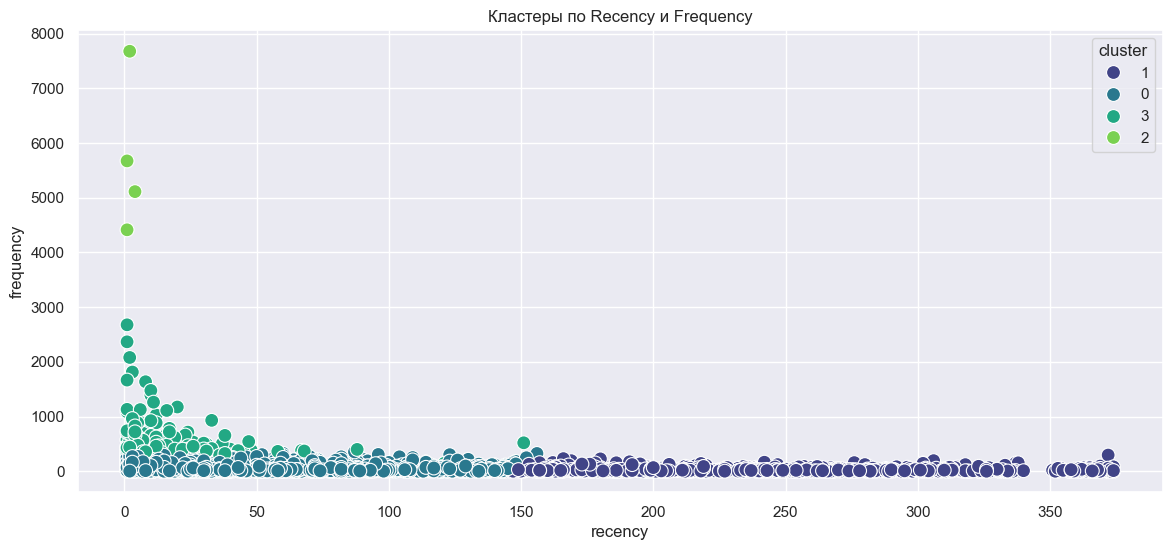

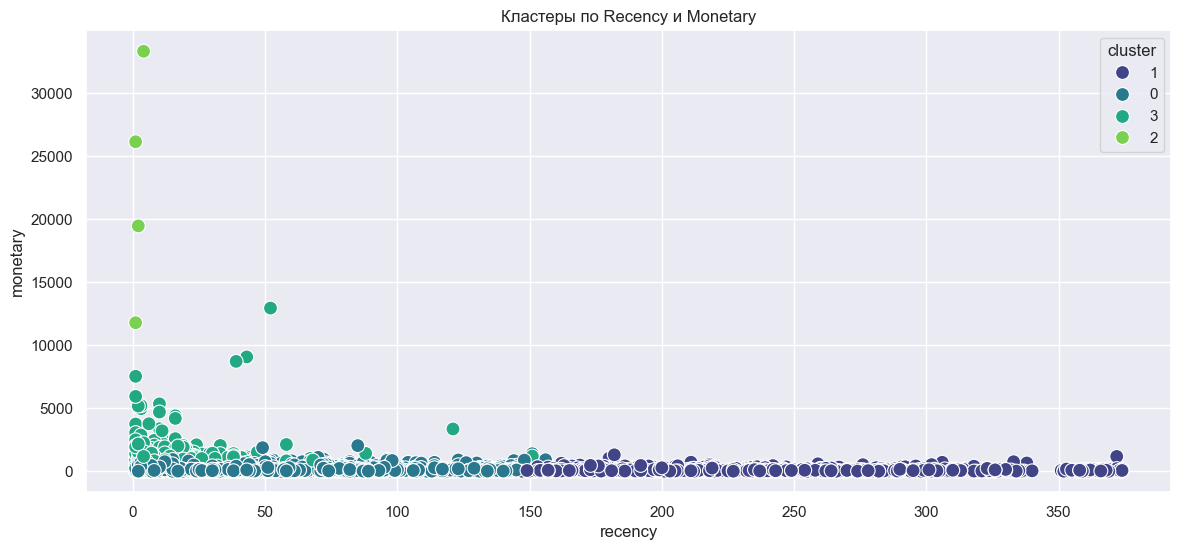

In [164]:
rfm['cluster'] = rfm['cluster'].astype(str)

sns.scatterplot(data=rfm, x='recency', y='frequency', hue='cluster', palette='viridis', s=100)
plt.title("Кластеры по Recency и Frequency")
plt.show()

sns.scatterplot(data=rfm, x='recency', y='monetary', hue='cluster', palette='viridis', s=100)
plt.title("Кластеры по Recency и Monetary")
plt.show()

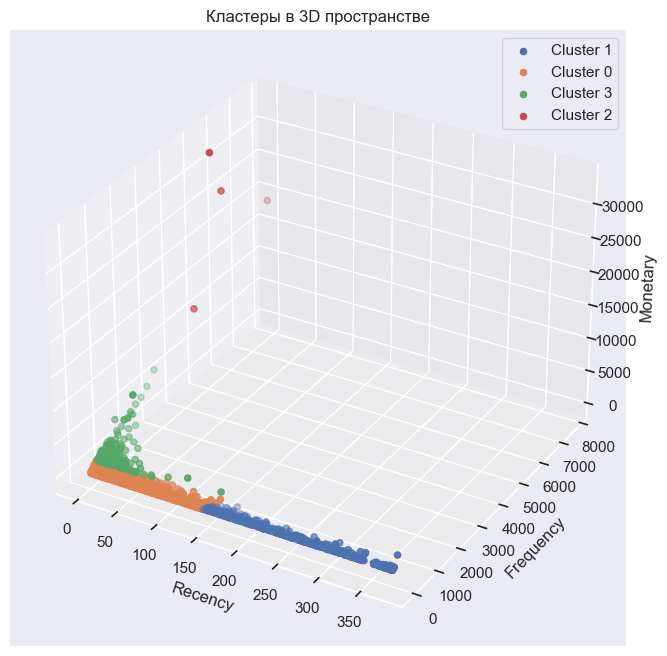

In [165]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster in rfm['cluster'].unique():
    cluster_data = rfm[rfm['cluster'] == cluster]
    ax.scatter(cluster_data['recency'], cluster_data['frequency'], cluster_data['monetary'], label=f'Cluster {cluster}')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('Кластеры в 3D пространстве')
ax.legend()

plt.show()

## NLP

In [168]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    
    text = re.sub(r'[^a-z\s]', '', text)
    
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words])
    
    return text

data['processed_description'] = data['Description'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stepan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Stepan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [170]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(data['processed_description'])

In [172]:
X = X_tfidf

n_clusters = 5  
kmeans = KMeans(n_clusters=n_clusters)
data['cluster'] = kmeans.fit_predict(X)

data[['Description', 'cluster']].head()

,Description,cluster
0,WHITE HANGING HEART T-LIGHT HOLDER,0
1,WHITE METAL LANTERN,2
2,CREAM CUPID HEARTS COAT HANGER,2
3,KNITTED UNION FLAG HOT WATER BOTTLE,1
4,RED WOOLLY HOTTIE WHITE HEART.,0


In [174]:
for cluster_id in range(n_clusters):
    print(f"Cluster {cluster_id}:")
    cluster_data = data[data['cluster'] == cluster_id]
    print(cluster_data[['Description']].head(10)) 
    print('\n')

Cluster 0:
                           Description
0   WHITE HANGING HEART T-LIGHT HOLDER
4       RED WOOLLY HOTTIE WHITE HEART.
6    GLASS STAR FROSTED T-LIGHT HOLDER
19         RECIPE BOX WITH METAL HEART
49  WHITE HANGING HEART T-LIGHT HOLDER
62      RED WOOLLY HOTTIE WHITE HEART.
64   GLASS STAR FROSTED T-LIGHT HOLDER
66  WHITE HANGING HEART T-LIGHT HOLDER
79      RED WOOLLY HOTTIE WHITE HEART.
81   GLASS STAR FROSTED T-LIGHT HOLDER


Cluster 1:
                            Description
3   KNITTED UNION FLAG HOT WATER BOTTLE
5          SET 7 BABUSHKA NESTING BOXES
21             JAM MAKING SET WITH JARS
34  ROUND SNACK BOXES SET OF4 WOODLAND 
40      SET 2 TEA TOWELS I LOVE LONDON 
44              MINI PAINT SET VINTAGE 
61  KNITTED UNION FLAG HOT WATER BOTTLE
63         SET 7 BABUSHKA NESTING BOXES
78  KNITTED UNION FLAG HOT WATER BOTTLE
80         SET 7 BABUSHKA NESTING BOXES


Cluster 2:
                           Description
1                  WHITE METAL LANTERN
2       CREAM CU

In [175]:
from gensim.models import Word2Vec

model = Word2Vec(sentences=data['processed_description'], vector_size=100, window=5, min_count=1, workers=4)
def vectorize_description(words):
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

data['vector'] = data['processed_description'].apply(vectorize_description)

X = np.vstack(data['vector'].values)

In [177]:
from sklearn.cluster import KMeans

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
data['cluster'] = kmeans.fit_predict(X)

In [178]:
for cluster in range(n_clusters):
    print(f"\n Кластер {cluster}:")
    print(data[data['cluster'] == cluster]['Description'].sample(10))


 Кластер 0:
222235               RED DRAGONFLY HELICOPTER
43365                BLACK RECORD COVER FRAME
113754             FELTCRAFT BUTTERFLY HEARTS
455123        HOT WATER BOTTLE I AM SO POORLY
367225             HOT WATER BOTTLE KEEP CALM
381463    12 PENCILS SMALL TUBE RED RETROSPOT
123792        S/4 PINK FLOWER CANDLES IN BOWL
182278          ASSORTED COLOUR BIRD ORNAMENT
148974             FELTCRAFT 6 FLOWER FRIENDS
108932          ASSORTED COLOUR BIRD ORNAMENT
Name: Description, dtype: object

 Кластер 1:
419251                VINTAGE BELLS GARLAND
171597    AIRLINE BAG VINTAGE JET SET WHITE
24201                  HOT BATHS METAL SIGN
477714               WALL ART GARDEN HAVEN 
9450      CHRISTMAS HANGING HEART WITH BELL
336030      GIN & TONIC DIET GREETING CARD 
106910              FLYING PIG WATERING CAN
116149        BLUE GIANT GARDEN THERMOMETER
143618              MINI PAINT SET VINTAGE 
12459               HAND WARMER BIRD DESIGN
Name: Description, dtype: object

 Класте

In [188]:
tfidf = TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.8, min_df=5)
X_tfidf = tfidf.fit_transform(data['processed_description'])

feature_names = tfidf.get_feature_names_out()

def get_top_tfidf_words(cluster, n=5):
    cluster_indices = data[data['cluster'] == cluster].index  # Индексы товаров в кластере
    valid_indices = [i for i in cluster_indices if i < X_tfidf.shape[0]]  # Проверяем, что индексы не выходят за пределы
    cluster_tfidf = X_tfidf[valid_indices].mean(axis=0) if valid_indices else np.zeros((1, X_tfidf.shape[1]))  
    sorted_indices = np.argsort(cluster_tfidf.A1)[::-1]  # Сортируем по убыванию значимости
    return [feature_names[i] for i in sorted_indices[:n]]

cluster_keywords = {}
for cluster in range(n_clusters):
    top_words = get_top_tfidf_words(cluster)
    cluster_keywords[cluster] = top_words
    print(f" Кластер {cluster}: {', '.join(top_words)}")


 Кластер 0: bag, set, red, heart, retrospot
 Кластер 1: bag, set, heart, red, retrospot
 Кластер 2: bag, set, red, heart, retrospot
 Кластер 3: bag, set, red, heart, retrospot
 Кластер 4: bag, set, red, heart, retrospot
 Кластер 5: bag, set, red, heart, vintage
 Кластер 6: bag, set, red, heart, retrospot
 Кластер 7: bag, set, heart, red, retrospot
 Кластер 8: bag, set, red, heart, retrospot
 Кластер 9: bag, set, heart, red, retrospot


## Прогноз

In [200]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day_of_the_week,TotalRevenue,processed_description,cluster,vector,joined_description
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Wednesday,15.30,white hanging heart tlight holder,1,"[0.07488657, -0.063458584, -0.2196802, 0.17767...",w h i t e h a n g i n g h e a r t t l i ...
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,20.34,white metal lantern,7,"[0.06989442, -0.12228217, -0.24110357, 0.18352...",w h i t e m e t a l l a n t e r n
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Wednesday,22.00,cream cupid heart coat hanger,3,"[0.0020242806, -0.08571397, -0.21450992, 0.040...",c r e a m c u p i d h e a r t c o a t ...
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,20.34,knitted union flag hot water bottle,7,"[0.04593713, -0.03621987, -0.190137, 0.1554089...",k n i t t e d u n i o n f l a g h o t ...
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Wednesday,20.34,red woolly hottie white heart,7,"[0.108828075, -0.04620603, -0.22811066, 0.2504...",r e d w o o l l y h o t t i e w h i t e ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,Friday,10.20,pack spaceboy napkin,6,"[0.11230916, -0.18310225, -0.06356952, -0.3754...",p a c k s p a c e b o y n a p k i n
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,Friday,12.60,childrens apron dolly girl,9,"[0.04370537, -0.05404493, -0.13639139, -0.0626...",c h i l d r e n s a p r o n d o l l y g ...
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,Friday,16.60,childrens cutlery dolly girl,9,"[0.030906638, -0.039503902, -0.14204836, 0.017...",c h i l d r e n s c u t l e r y d o l l y ...
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,Friday,16.60,childrens cutlery circus parade,8,"[0.082419686, -0.09714142, -0.17848603, -0.044...",c h i l d r e n s c u t l e r y c i r c u ...


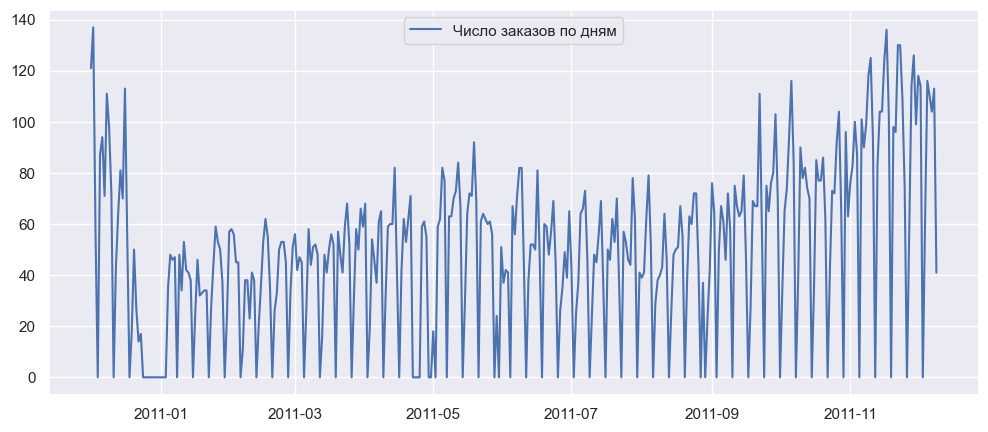

In [202]:
daily_sales = data.resample('D', on='InvoiceDate').agg({'InvoiceNo': 'nunique'})

daily_sales.rename(columns={'InvoiceNo': 'num_orders'}, inplace=True)

plt.figure(figsize=(12,5))
plt.plot(daily_sales, label="Число заказов по дням")
plt.legend()
plt.show()

In [204]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(daily_sales['num_orders'])
print(f'P-значение: {result[1]}')

if result[1] > 0.05:
    print("Ряд не стационарен.")
else:
    print("Ряд стационарен")

P-значение: 0.08533498308784598
Ряд не стационарен.


In [205]:
daily_sales['diff'] = daily_sales['num_orders'].diff()
daily_sales = daily_sales.dropna()
result = adfuller(daily_sales['diff'])
print(f'P-значение: {result[1]}')

if result[1] > 0.05:
    print("Ряд не стационарен.")
else:
    print("Ряд стационарен")

P-значение: 1.1811915948519224e-09
Ряд стационарен


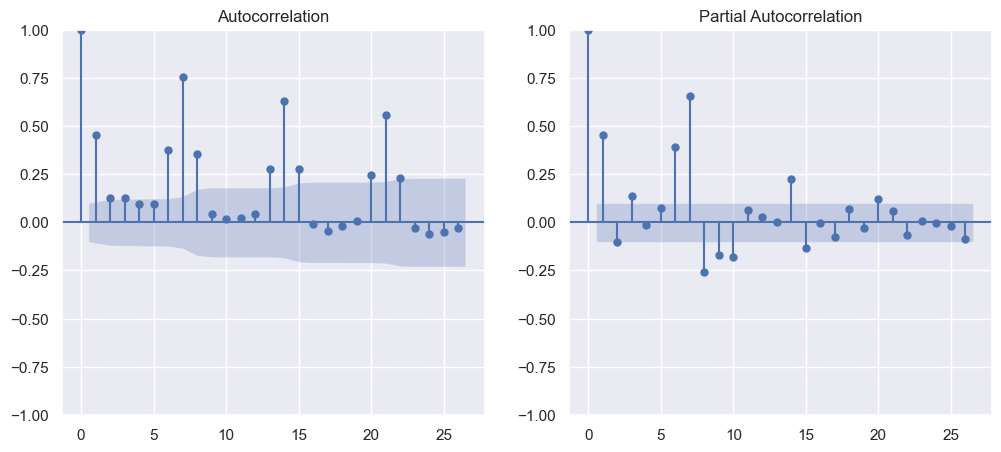

In [206]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12,5))

plt.subplot(121)
plot_acf(daily_sales['num_orders'], ax=plt.gca())  
plt.subplot(122)
plot_pacf(daily_sales['num_orders'], ax=plt.gca()) 

plt.show()

C:\Users\Stepan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


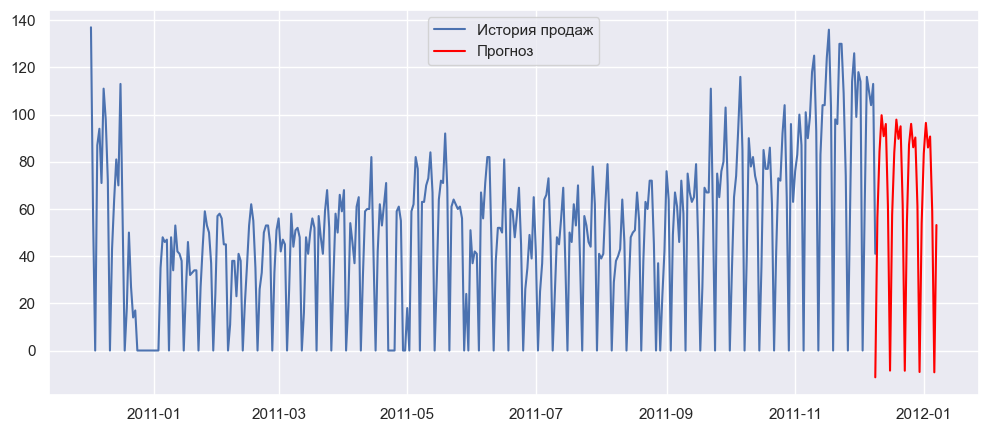

In [209]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = 22, 1, 15

model = ARIMA(daily_sales['num_orders'], order=(p, d, q))
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

plt.figure(figsize=(12,5))
plt.plot(daily_sales['num_orders'], label="История продаж")
plt.plot(pd.date_range(daily_sales.index[-1], periods=30, freq='D'), forecast, label="Прогноз", color='red')
plt.legend()
plt.show()